# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')
if '..' not in sys.path:
    sys.path.insert(0, '..')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer
from model_evaluator import DataSource, DataPredSelection

# Start Experiment Runner

In [3]:
req = cts.ICAO_REQ.PIXELATION
ds = GTName.FVC
aligned = False
aligned_str = 'aligned' if aligned else 'not_aligned'
model_name = f'{ds.value.lower()}_{aligned_str}/{req.value.lower()}'

#model_exp_id = ''#get_experiment_id(req, aligned, ds)

kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': f'Training network for {req.value.upper()} requisite',
        'tags': ['vgg16', 'ground truths', 'adamax', ds.value.lower(), 'binary_output', req.value.lower(), 'single_task', aligned_str],
        'src_files': ["src/*.py"]
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        #'reqs': list(cts.ICAO_REQ),
        'reqs': [req],
        'aligned': aligned,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [ds]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',#model_exp_id,
        'sample_training_data': False,
        'sample_prop': 1.
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 10,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 413641
Process ID: 525721
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training network for PIXELATION requisite',
                'name': 'train_vgg16',
                'src_files': ['src/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'fvc',
                         'binary_output',
                         'pixelation',
                         'single_task',
                         'not_aligned']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f118a4faee0>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 4)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 4)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 4)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames belonging to 2 classes.
Found 547 validated image filenames belonging to 2 classes.
Found 288 validated image filenames belonging to 2 classes.
TOTAL: 5763

Logging class indices
 ..Train Generator: {'0': 0, '1': 1}
 ..Valid Generator: {'0': 0, '1': 1}
 ..Test Generator: {'0': 0, '1': 1}

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: INK_MARK
N_TRAIN_COMP: 4928 (100.0%)
N_TRAIN_NOT_COMP: 0 (0.0%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 547 (100.0%)
N_VALIDATION_NOT_COMP: 0 (0.0%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 288 (100.0%)
N_TEST_NOT_COMP: 0 (0.0%)
N_TEST_DUMMY: 0 (0.0%)
----


In [10]:
runner.summary_gen_labels_dist()

-------------------- summary gen labels dist -------------------
GEN_N_TRAIN_COMP: 0 (0.0%)
GEN_N_TRAIN_NON_COMP: 4928 (100.0%)
GEN_N_TRAIN_DUMMY: 0 (0.0%)
GEN_N_VALID_COMP: 0 (0.0%)
GEN_N_VALID_NON_COMP: 547 (100.0%)
GEN_N_VALID_DUMMY: 0 (0.0%)
GEN_N_TEST_COMP: 0 (0.0%)
GEN_N_TEST_NON_COMP: 288 (100.0%)
GEN_N_TEST_DUMMY: 0 (0.0%)


# Create Model

In [11]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


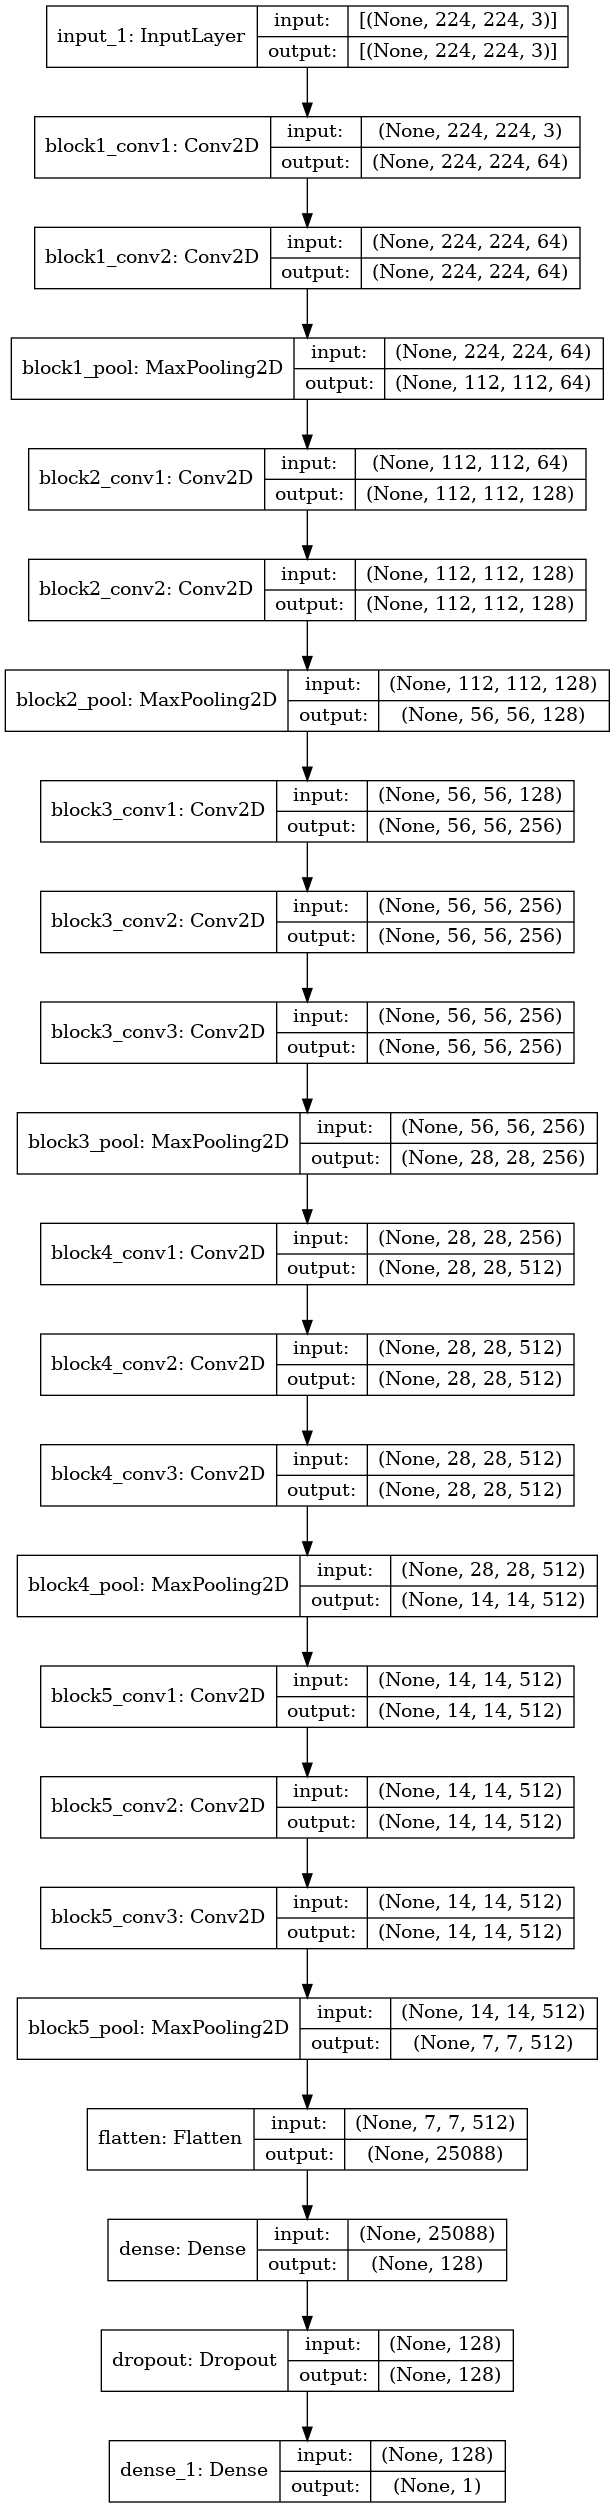

In [12]:
runner.vizualize_model(outfile_path=f"figs/{model_name.replace('/','_')}.png")

In [13]:
runner.model_summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Training Model

In [14]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
Epoch 1/10
77/77 [==============================] - 342s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to training_ckpt/best_model.hdf5
Epoch 2/10
77/77 [==============================] - 337s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/10
77/77 [==============================] - 338s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/10
77/77 [==============================] - 337s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/10
77/77 [==============================] - 338s 4s/step - loss: 

# Plots

-------------------- draw training history -------------------


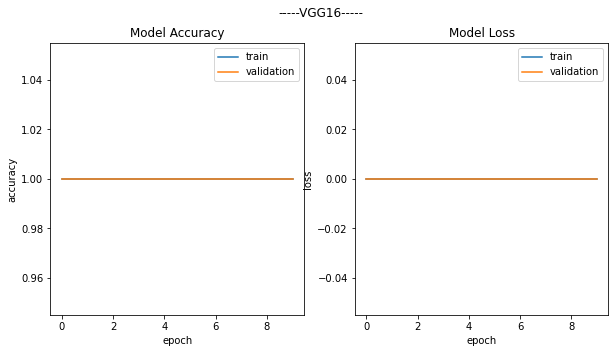

In [15]:
runner.draw_training_history()

# Load Best Model

In [16]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [17]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [18]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

Testing Trained Model
Predicting labels....
9/9 [==============================] - 32s 4s/step
Prediction finished!
Requisite: INK_MARK


ValueError: not enough values to unpack (expected 2, got 1)

### Vizualize Model Classification

In [ ]:
runner.vizualize_predictions(n_imgs=10)

#### False Positives

In [ ]:
runner.vizualize_predictions(n_imgs=3, data_pred_selection=DataPredSelection.ONLY_FP)

#### False Negatives

In [ ]:
runner.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_FN)

#### True Positives

In [ ]:
runner.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_TP)

#### True Negatives

In [ ]:
runner.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_TN)

## Test Split

In [ ]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

### Vizualize Model Classification

In [ ]:
runner.vizualize_predictions(n_imgs=10)

#### False Positives

In [ ]:
runner.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_FP)

#### False Negatives

In [ ]:
runner.vizualize_predictions(n_imgs=10, data_pred_selection=DataPredSelection.ONLY_FN)

#### True Positives

In [ ]:
runner.vizualize_predictions(n_imgs=1, data_pred_selection=DataPredSelection.ONLY_TP)

#### True Negatives

In [ ]:
runner.vizualize_predictions(n_imgs=5, data_pred_selection=DataPredSelection.ONLY_TN)

# Finishing Experiment Manager

In [19]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
